# Table of Contents

- Introduction
- Importing Libraries
- Get the Data
- Data Exploration and Visualization
- Preparing Data for ML algorithms

## Introduction
Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

### Attribute Information:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- **capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- fnlwgt: continuous. The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
    A single cell estimate of the population 16+ for each state.
    B Controls for Hispanic Origin by age and sex.
    C Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used.

The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# GOAL :

To Predict whether income exceeds $50K/yr based on census data.

# Importing dataset:

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#To print all columns and all rows
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [3]:
#importing data
df=pd.read_csv("Census_Income_data.csv") #Reading csv file
df

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

In [4]:
#Displaying the top 5 columns of the dataset
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

# Primary Inferences
Above is the dataset and we can see there are some numerical columns and some categorical columns.But we have to predict wheather a person has income of $50k per year.So from this respective statement we can say that my target is Income and this is a Classification Poblem.

In [5]:
#Checking shape of dataset
df.shape

(32560, 15)

In this perticular data set we have 32560 rows and 15 columns.

In [6]:
#Checking all column names
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Above are the list of column names in the dataset.

In [7]:
#Checking the data types of all columns
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In this particular dataset we have two types of columns int type and object type.

# Separating categorical and numberical columns

In [8]:
# Separating categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Above are the list of categorical columns.

In [9]:
# Separating numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


Above are the list of numerical columns.

# EDA (Exploratory Data Analysis)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


It looks very clear that we donot have any empty observations in the dataset.And also we can have a look into data types of each column.

In [11]:
df.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

Describe method will give us summary of numerical columns only by default.This will help us to analyze the mean meadian values to predict the presence of outliers/skewness and checking whether null values present in dataset or not by looking into count.

# Observations



In [12]:
#Checking unique values of each column
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

Above are the unique value count of each column in the dataset.

In [13]:
#Checking null values in the dataset
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We  don't find any null values in my dataset.

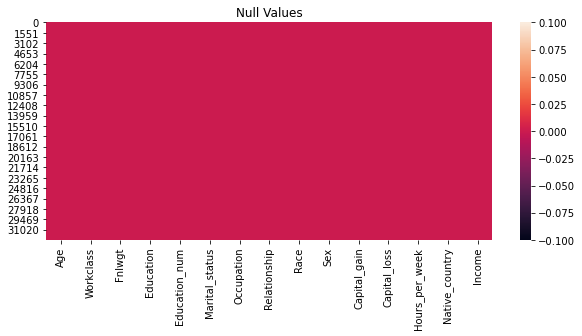

In [14]:
#Visualizeing null values
plt.figure(figsize=[10,4])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

By Visualization it looks there are no null values in the data set.

In [15]:
#Checking unique values of target column
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

There are only two unique counts in the target column so it's a binary classification problem.

In [16]:
#Checking for empty observations
df.loc[df['Income'] == " "]

Empty DataFrame
Columns: [Age, Workclass, Fnlwgt, Education, Education_num, Marital_status, Occupation, Relationship, Race, Sex, Capital_gain, Capital_loss, Hours_per_week, Native_country, Income]
Index: []

There are no empty observations in the dataset.

In [17]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('-'*50)

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
--------------------------------------------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
--------------------------------------------------
203488    13
123011    13
164190    13
121124    12
148995    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: Fnlwgt, Length: 21647, dtype: int64
--------------------------------------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th         

So we can notice that there are some '?' entries in Workclass, Occupation and Native_country column.

In [18]:
# let's check the mode of Workclass column 
df["Workclass"].mode()  # we will fill the '?' values with this mode value

0     Private
dtype: object

Mode for Workclass column is 'Private'.

In [19]:
# let's check the mode of Occupation column 
df["Occupation"].mode()  # we will fill the '?' values with this mode value

0     Prof-specialty
dtype: object

Mode of Occupation column is 'Prof-specialty'.

In [20]:
# let's check the mode of Native_country column 
df["Native_country"].mode()  # we will fill the '?' values with this mode value

0     United-States
dtype: object

Mode of Native_country column is 'United-States'.

In [21]:
#Replacing '?' with mode value for the above three columns
df['Workclass'] = df.Workclass.str.replace('?', 'Private')
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

We have replaced all '?' with there respective mode values.

In [22]:
#Creating alist of the above columns
edit_cols = ['Native_country','Occupation','Workclass']
# Check if ? is present
for col in edit_cols:
    print(f"? in {col}: {df[(df[col] == '?')].any().sum()}")

? in Native_country: 0
? in Occupation: 0
? in Workclass: 0


This confirms that there are no more '?' values in the above columns

In [23]:
#Checking the value count of Capital_gain column
df["Capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1639         1
5060         1
6097         1
1455         1
7978         1
Name: Capital_gain, Length: 119, dtype: int64

In the Capital_gain column there are 92% of the values as zero, so we can drop this column.

In [24]:
#Checking the value count of Capital_loss column
df["Capital_loss"].value_counts()

0       31041
1902      202
1977      168
1887      159
1485       51
        ...  
2467        1
1539        1
155         1
2282        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In the Capital_loss column there are 95% of the values as zero values so we can drop this column too.

Possibilities for capital gain and capital loss

- Both capital gain and capital loss can be zero
- If capital.gain is zero there is possibility of capital loss being high or above zero.
- If capital loss is zero there is possibility of capital gain being high or above zero.

In [25]:
# Exploring Case when capital.gain and capital loss both are zero. As this category of people are more in our dataset.
print(f"Number of observations having capital gain and capital loss zero: {df[(df['Capital_loss'] == 0) & (df['Capital_gain'] == 0)].shape}")
for col in categorical_columns:
    print(f"================================{col}=================================")
    print(df[(df['Capital_loss'] == 0) & (df['Capital_gain'] == 0)][col].value_counts())

Number of observations having capital gain and capital loss zero: (28330, 15)
================================Workclass=================================
 Private             21637
 Self-emp-not-inc     2128
 Local-gov            1772
 State-gov            1134
 Self-emp-inc          832
 Federal-gov           808
 Without-pay            12
 Never-worked            7
Name: Workclass, dtype: int64
================================Education=================================
 HS-grad         9415
 Some-college    6533
 Bachelors       4384
 Masters         1300
 Assoc-voc       1194
 11th            1089
 Assoc-acdm       930
 10th             865
 7th-8th          582
 9th              474
 12th             403
 Prof-school      363
 5th-6th          308
 Doctorate        284
 1st-4th          159
 Preschool         47
Name: Education, dtype: int64
================================Marital_status=================================
 Married-civ-spouse       12199
 Never-married             9914


# Observations
- So 88% of people in our dataset has capital gain and loss = 0
- This concludes capital gain and capital loss are highly skewed features and even have outliers which need to be taken care of.
- Workclass contains unknown values.

Let's find more about capital gain by excluding zero value.

## Feature Engineering

In [26]:
#Checking description of data set
df.loc[df['Capital_gain'] > 0,:].describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  2711.000000  2.711000e+03    2711.000000   2711.000000        2711.0   
mean     44.018075  1.881213e+05      11.065290  12942.511988           0.0   
std      13.270366  1.033748e+05       2.663505  22398.590323           0.0   
min      17.000000  1.930200e+04       1.000000    114.000000           0.0   
25%      35.000000  1.181000e+05       9.000000   3411.000000           0.0   
50%      43.000000  1.759430e+05      10.000000   7298.000000           0.0   
75%      52.000000  2.365110e+05      13.000000  14084.000000           0.0   
max      90.000000  1.033222e+06      16.000000  99999.000000           0.0   

       Hours_per_week  
count     2711.000000  
mean        43.511619  
std         12.209720  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         50.000000  
max         99.000000

# Observations

Maximum value of capital gain is 99999 which is far above 75% quartile range. This shows there is a scope for outliers. Lets try and understand more about this maximum value of 99999.

In [27]:
print(f"Number of observations having capital gain of 99999:{df.loc[df['Capital_gain'] == 99999,:].shape}")
print(f"Income counts: {df.loc[df['Capital_gain'] == 99999,:]['Income'].value_counts()}")

Number of observations having capital gain of 99999:(159, 15)
Income counts:  >50K    159
Name: Income, dtype: int64


# Observations

This shows that their income is greater than 50K.

In [28]:
df.loc[df['Capital_loss'] > 0,:].describe()

Age         Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  1519.000000    1519.000000    1519.000000        1519.0   1519.000000   
mean     41.697828  185492.941409      10.969059           0.0   1871.428571   
std      12.625609   97621.521906       2.688426           0.0    376.571535   
min      17.000000   20953.000000       1.000000           0.0    155.000000   
25%      32.000000  118854.000000       9.000000           0.0   1672.000000   
50%      41.000000  175109.000000      10.000000           0.0   1887.000000   
75%      50.000000  228991.500000      13.000000           0.0   1977.000000   
max      90.000000  816750.000000      16.000000           0.0   4356.000000   

       Hours_per_week  
count     1519.000000  
mean        43.252798  
std         12.247258  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         50.000000  
max         99.000000

In [29]:
print(f"Number of observations having capital loss of 4356:{df.loc[df['Capital_loss'] == 4356,:].shape}")
print("\nIncome Distribution among people with capital loss above mean:")
print(f"Income counts:\n{df.loc[df['Capital_loss'] >= 1871,:]['Income'].value_counts()}")

Number of observations having capital loss of 4356:(3, 15)

Income Distribution among people with capital loss above mean:
Income counts:
 >50K     658
 <=50K    277
Name: Income, dtype: int64


# Observations

- People with Income above 50K are having capital loss above mean value.
- It shows there are some other parameters affecting their loss irrespective of high salary.

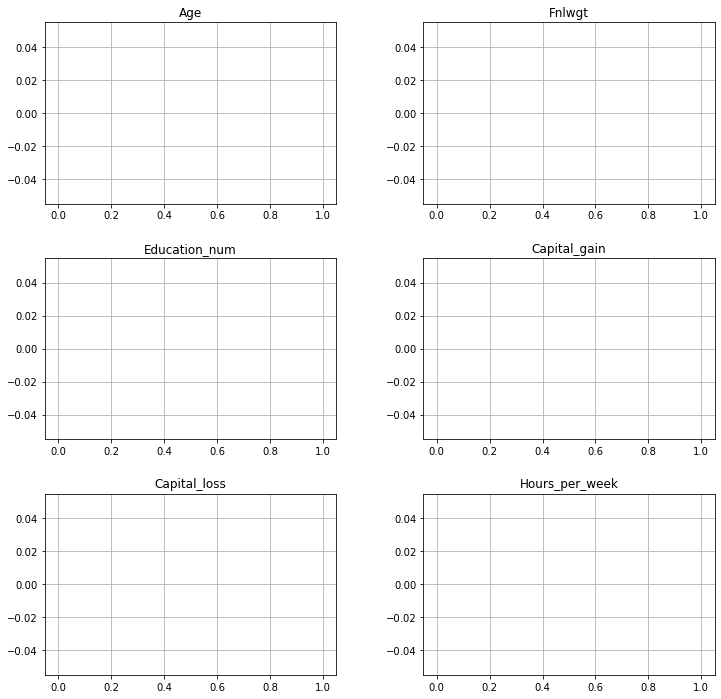

In [30]:
# let's understand characteristics of people having capital loss greater than mean value and having income greater than 50K
df[(df['Capital_loss'] >= 1871) & (df['Income'] == '>50K')].hist(figsize = (12,12));

# Observations 

- Education and hours per week are significantaly high.
- There are some other factors affecting their loss other than the above.

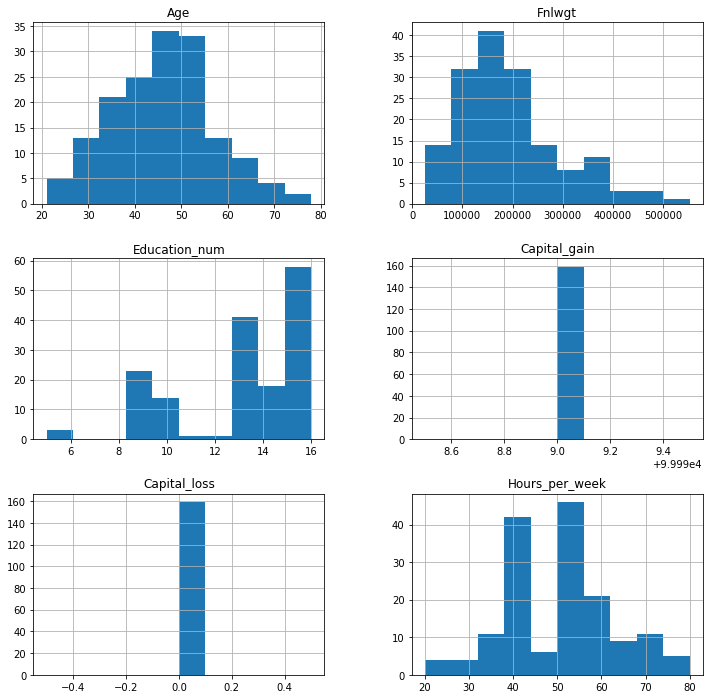

In [31]:
df.loc[df['Capital_gain'] == 99999,:].hist(figsize = (12,12));

In [32]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

# replace elements in list.
df['Education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
df['Education'].replace(to_replace = elementary,value = 'Elementary_school',inplace = True)

df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [33]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
df['Marital_status'].replace(to_replace = married ,value = 'Married',inplace = True)
df['Marital_status'].replace(to_replace = separated,value = 'Separated',inplace = True)

df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [34]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
df['Workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
df['Workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

df['Workclass'].value_counts()


 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

# Univariate Analysis:

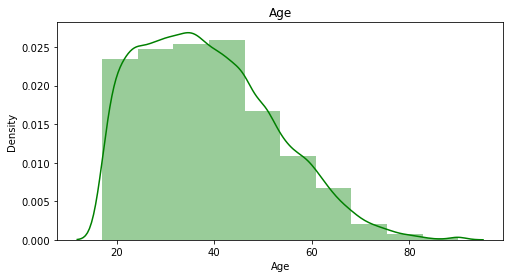

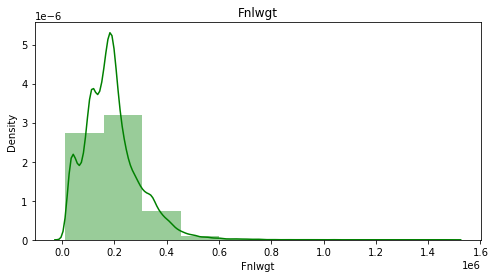

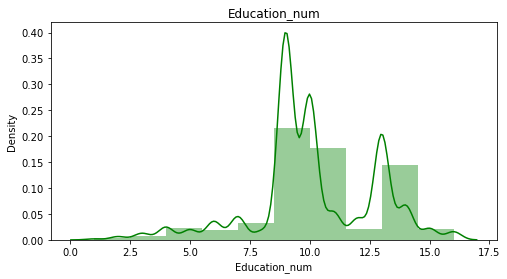

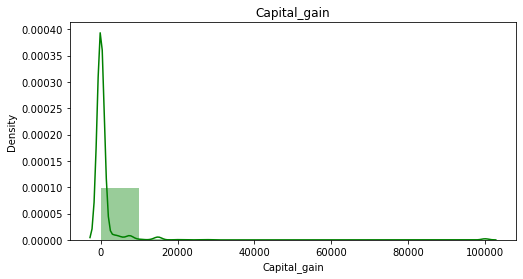

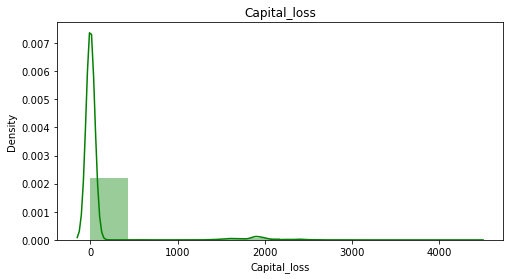

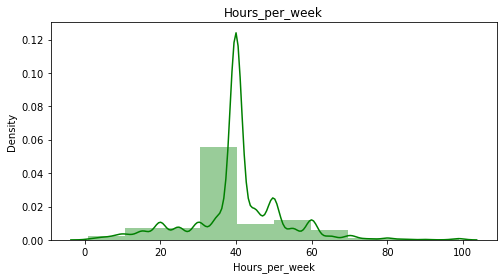

In [35]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="g")
    plt.title(i)
    plt.show()

All the numerical columns are skewed but Age column has lesser skewness than compared to others

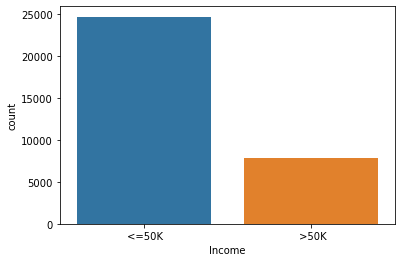

In [36]:
#Count plot for Income
sns.countplot(df['Income']);

# Observations

By looking into the count plot of target we can say that there is a data imbalancing issue.And also we can say that People with saalary >50k per year are very less. Most of the people are getting income below 50k per year.

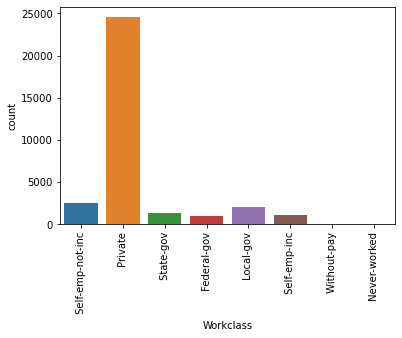

In [37]:
#Count plot for Workclass
sns.countplot(df['Workclass'])
plt.xticks(rotation=90);

# Observations
So maximum people has choosen Private sector for working.And very few people choosed work Without-pay and Never-worked.

<AxesSubplot:xlabel='Education_num', ylabel='count'>

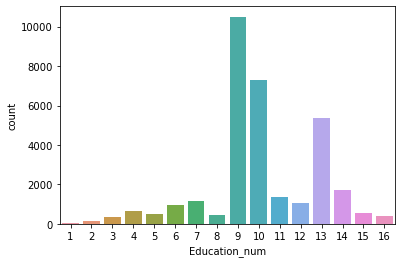

In [38]:
#Count plot for Education_num
sns.countplot(df['Education_num'])

# Observations
Maximum woObservationsrkers belong to Education number 9,10,13 and very less people belong to 1,2,3.

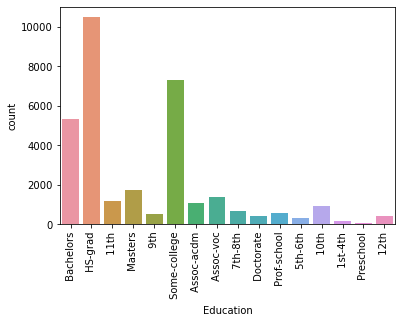

In [39]:
#Count plot for Education
sns.countplot(df['Education'])
plt.xticks(rotation=90);

# Observations
Above plot says that HS-grad, Bachelors and Some-college has maximum count, which means most of the working people with these 3 types of education has more chance to get job.

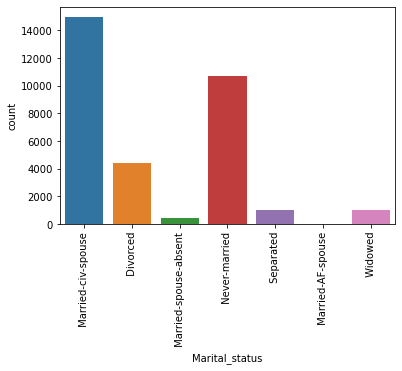

In [40]:
#Count plot for Marital_status
sns.countplot(df['Marital_status'])
plt.xticks(rotation=90);

# Observations
People who are Married-civ-spouse, Never-married are more in number and Married-AF-spouse is too less in number.

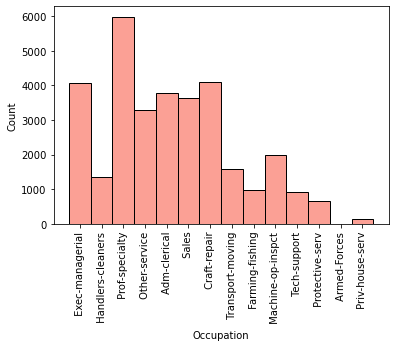

In [41]:
#Hist plot for Occupation
sns.histplot(df['Occupation'],color='salmon')
plt.xticks(rotation=90);

# Observations
Most of the people has choosen Prof-specialty,Exec-managerial, Craft-repair as there Occupation except this Priv-house-serv and Armed-Forces are very less in count.

In [42]:
#Checking the value count of Relationship column
df["Relationship"].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

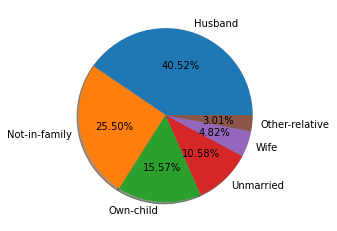

In [43]:
#Ploting pie chart for Relationship
labels='Husband','Not-in-family','Own-child','Unmarried','Wife','Other-relative'
fig, ax = plt.subplots()
ax.pie(df['Relationship'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

# Observations
By looking into the pie chart most of the count is with Husband, Not-in-family and own-child.

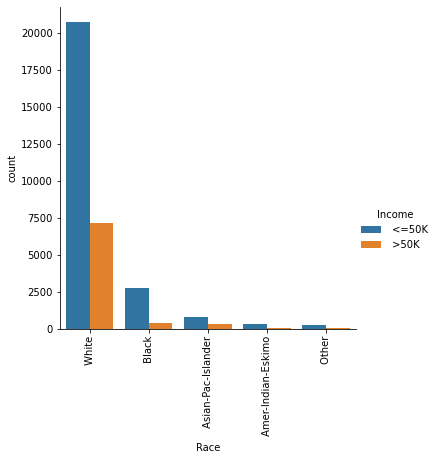

In [44]:
#Factor plot for Race
sns.factorplot('Race',kind='count',data=df,hue='Income')
plt.xticks(rotation=90);

# Observations
In US white people have more chance of getting job than any other raced people.

In [45]:
#Factor plot for Sex
sns.factorplot('Sex',kind='count',data=df,hue='Income')
plt.xticks(rotation=0);

# Observations
Irrespective of income males have high count of getting job than women.And men also has high count of getting income >50k per year.

In [46]:
#Checking the value count of Sex column
df["Sex"].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [47]:
#Ploting pie chart for Sex
labels='Male','Female'
fig, ax = plt.subplots()
ax.pie(df['Sex'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

# Observations
Most of the working people about 67% are male and women workers are less in number.

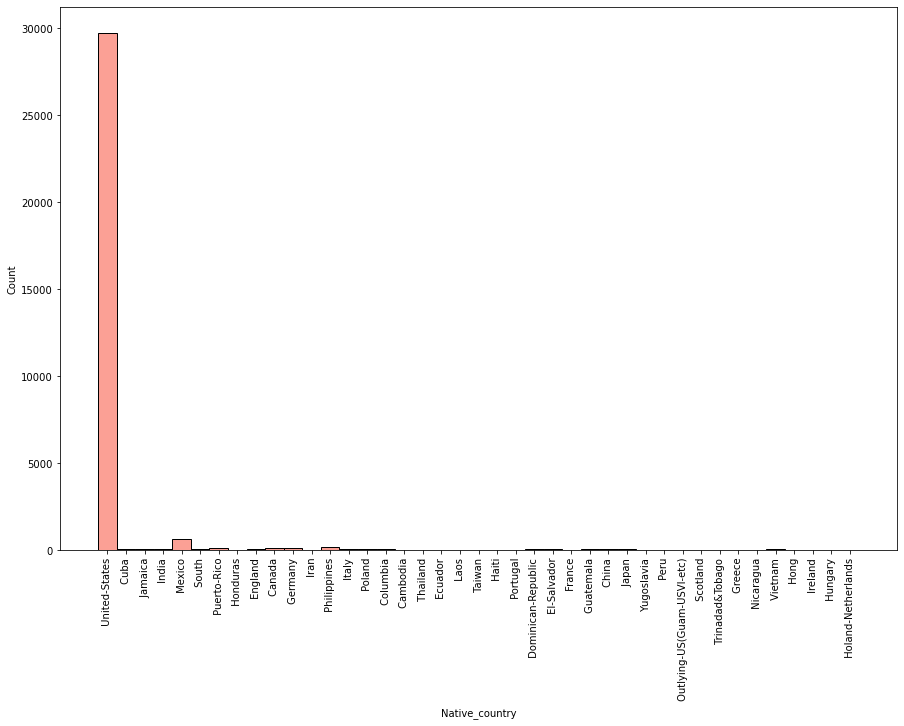

In [48]:
#Hist plot for Native_country
plt.figure(figsize=[15,10])
sns.histplot(df['Native_country'],color='salmon')
plt.xticks(rotation=90);

# Observations
So most of the people in US gets job rather than all other states.

# Bivariate Analysis:

In [49]:
# Exploring Case when capital.gain and capital loss both are zero. As this category of people are more in our dataset.
print(f"Number of observations having capital gain and capital loss zero: {df[(df['Capital_loss'] == 0) & (df['Capital_gain'] == 0)].shape}")
for col in categorical_columns:
    print(f"================================{col}=================================")
    print(df[(df['Capital_loss'] == 0) & (df['Capital_gain'] == 0)][col].value_counts())

Number of observations having capital gain and capital loss zero: (28330, 15)
================================Workclass=================================
 Private             21637
 Self-emp-not-inc     2128
 Local-gov            1772
 State-gov            1134
 Self-emp-inc          832
 Federal-gov           808
 Without-pay            12
 Never-worked            7
Name: Workclass, dtype: int64
================================Education=================================
 HS-grad         9415
 Some-college    6533
 Bachelors       4384
 Masters         1300
 Assoc-voc       1194
 11th            1089
 Assoc-acdm       930
 10th             865
 7th-8th          582
 9th              474
 12th             403
 Prof-school      363
 5th-6th          308
 Doctorate        284
 1st-4th          159
 Preschool         47
Name: Education, dtype: int64
================================Marital_status=================================
 Married-civ-spouse       12199
 Never-married             9914


# Observations
- So 88% of people in our dataset has capital gain and loss = 0
- This concludes capital gain and capital loss are highly skewed features and even have outliers which need to be taken care of.
- Workclass contains unknown values.

Let's find more about capital gain by excluding zero value.


In [50]:
#Checking description of data set
df.loc[df['Capital_gain'] > 0,:].describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  2711.000000  2.711000e+03    2711.000000   2711.000000        2711.0   
mean     44.018075  1.881213e+05      11.065290  12942.511988           0.0   
std      13.270366  1.033748e+05       2.663505  22398.590323           0.0   
min      17.000000  1.930200e+04       1.000000    114.000000           0.0   
25%      35.000000  1.181000e+05       9.000000   3411.000000           0.0   
50%      43.000000  1.759430e+05      10.000000   7298.000000           0.0   
75%      52.000000  2.365110e+05      13.000000  14084.000000           0.0   
max      90.000000  1.033222e+06      16.000000  99999.000000           0.0   

       Hours_per_week  
count     2711.000000  
mean        43.511619  
std         12.209720  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         50.000000  
max         99.000000

# Observations

Maximum value of capital gain is 99999 which is far above 75% quartile range. This shows there is a scope for outliers. Lets try and understand more about this maximum value of 99999.


In [51]:
print(f"Number of observations having capital gain of 99999:{df.loc[df['Capital_gain'] == 99999,:].shape}")
print(f"Income counts: {df.loc[df['Capital_gain'] == 99999,:]['Income'].value_counts()}")

Number of observations having capital gain of 99999:(159, 15)
Income counts:  >50K    159
Name: Income, dtype: int64


# Observations

This shows that their income is greater than 50K.


In [52]:
df.loc[df['Capital_loss'] > 0,:].describe()

Age         Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  1519.000000    1519.000000    1519.000000        1519.0   1519.000000   
mean     41.697828  185492.941409      10.969059           0.0   1871.428571   
std      12.625609   97621.521906       2.688426           0.0    376.571535   
min      17.000000   20953.000000       1.000000           0.0    155.000000   
25%      32.000000  118854.000000       9.000000           0.0   1672.000000   
50%      41.000000  175109.000000      10.000000           0.0   1887.000000   
75%      50.000000  228991.500000      13.000000           0.0   1977.000000   
max      90.000000  816750.000000      16.000000           0.0   4356.000000   

       Hours_per_week  
count     1519.000000  
mean        43.252798  
std         12.247258  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         50.000000  
max         99.000000

In [53]:
print(f"Number of observations having capital loss of 4356:{df.loc[df['Capital_loss'] == 4356,:].shape}")
print("\nIncome Distribution among people with capital loss above mean:")
print(f"Income counts:\n{df.loc[df['Capital_loss'] >= 1871,:]['Income'].value_counts()}")

Number of observations having capital loss of 4356:(3, 15)

Income Distribution among people with capital loss above mean:
Income counts:
 >50K     658
 <=50K    277
Name: Income, dtype: int64


# Observations

- People with Income above 50K are having capital loss above mean value.
- It shows there are some other parameters affecting their loss irrespective of high salary.

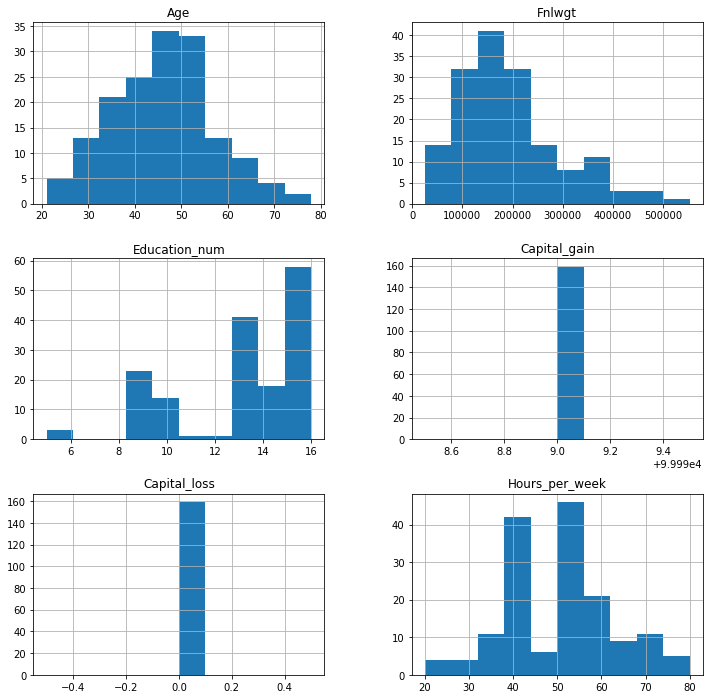

In [54]:
df.loc[df['Capital_gain'] == 99999,:].hist(figsize = (12,12));

# Observations
Age group and hours per week are fairly distributed for capital gain of 99999.

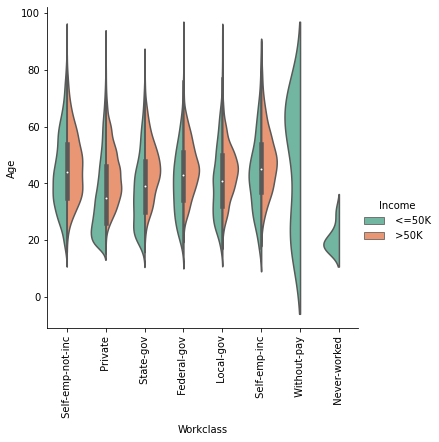

In [55]:
# Let's plot catplot for Workclass and Age
sns.catplot(x = "Workclass", y = "Age", hue = "Income", kind = "violin", data=df, split=True,palette='Set2')
plt.xticks(rotation=90);

# Observations
All the Workclass has chances of getting income >50k except Without-pay and Never-worked.Which means if a person is working then there is a chance that he gets income of >50k.But if he is not at all working then obviously he'll not get that income.

In [56]:
# Let's plot catplot for Marital_status and Education_num
sns.catplot(x = "Marital_status", y = "Education_num", hue = "Income", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

# Observations
If the education number is high then obviously Income is high, but for married-spouse-absent is showing high education_num.

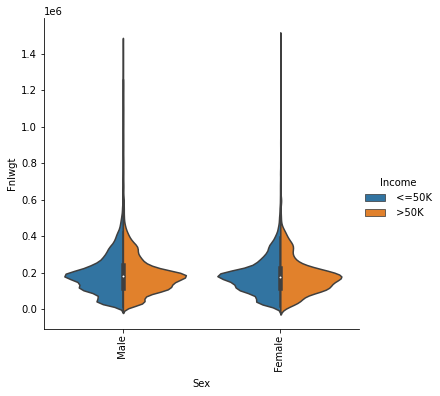

In [57]:
# Let's plot catplot for Sex and Fnlwgt
sns.catplot(x = "Sex", y = "Fnlwgt", hue = "Income", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

# Observations

Both for male and female the Fnlwgt is same and they have same income also.

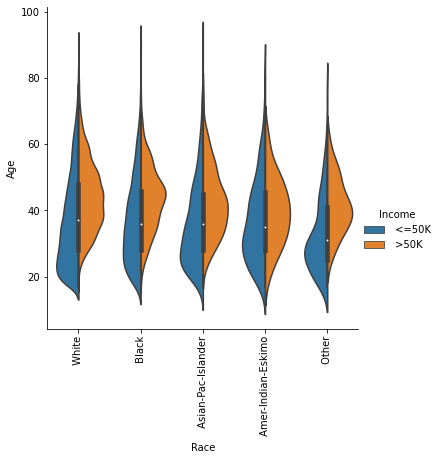

In [58]:
# Let's plot catplot for Race and Age
sns.catplot(x = "Race", y = "Age", hue = "Income", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

# Observations

Chances of getting income >50k is more in case of Whites.That means in US white peoples are dominating.

In [59]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Age and Fnlwgt')
sns.scatterplot(df['Age'],df['Fnlwgt'],hue=df["Income"]);

# Observations
As the age of the worker increses there is less chance to get more income,And also as the Fnlgwt increases then the chance to get income is decreaseing.

In [60]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Education_num and Age')
sns.scatterplot(df['Education_num'],df['Age'],hue=df["Income"]);

# Observations

People with age above 70 has less chance of getting work and As the education number increases then the chance of getting income>50k is also high.

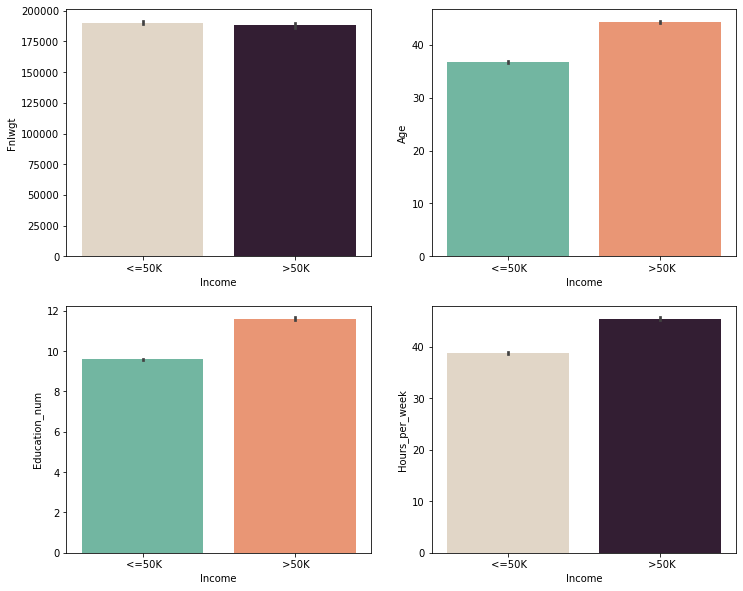

In [61]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking income with Fnlwgt
sns.barplot(x='Income',y='Fnlwgt',ax=axes[0,0],data=df,palette='ch:.25')

# Checking income with Age
sns.barplot(x='Income',y='Age',ax=axes[0,1],data=df,palette='Set2')

# Checking income with Education_num
sns.barplot(x='Income',y='Education_num',ax=axes[1,0],data=df,palette='Set2')

# Checking income with Hours_per_week
sns.barplot(x='Income',y='Hours_per_week',ax=axes[1,1],data=df,palette='ch:.25')
plt.show()

# Observations

- With Fnlwgt the chance of getting income >50k and <=50k both are almost equal.
- With Age the chance of getting >50k is high compared to chance of getting income <=50k.
- With Education_num the chance of getting income >50k is very high than <=50k.
- With hours_per_week also the chance of getting income >50k is high.

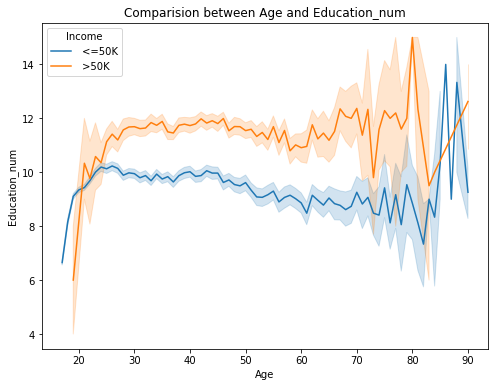

In [62]:
#Comparision between features using line plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Age and Education_num')
sns.lineplot(df['Age'],df['Education_num'],hue=df["Income"]);

# Observations
It looks very clear that as the education number is increasing chance of getting income >5ok is also increasing.And also as age is more means experience is more the chance of getting income more than 50k is also more.

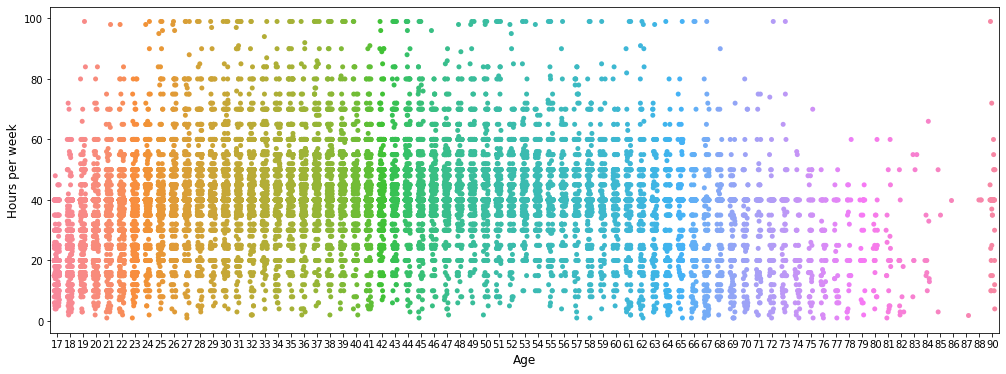

In [63]:
fig = plt.figure(figsize = (17,6))

sns.stripplot('Age','Hours_per_week', data = df,
         jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Hours per week',fontsize = 12);

# Observations
## Outliers Summary

- Capital gain of 99999 doesn't follow any pattern and from graph above it clearly distinguishes to be an outlier.
- Our dataset has people with age 90 and working for 40 hours per week in goverment or private sectors which is again unreasonable.
- Few people working for 99 hours per week.

# Multivariate Analysis:

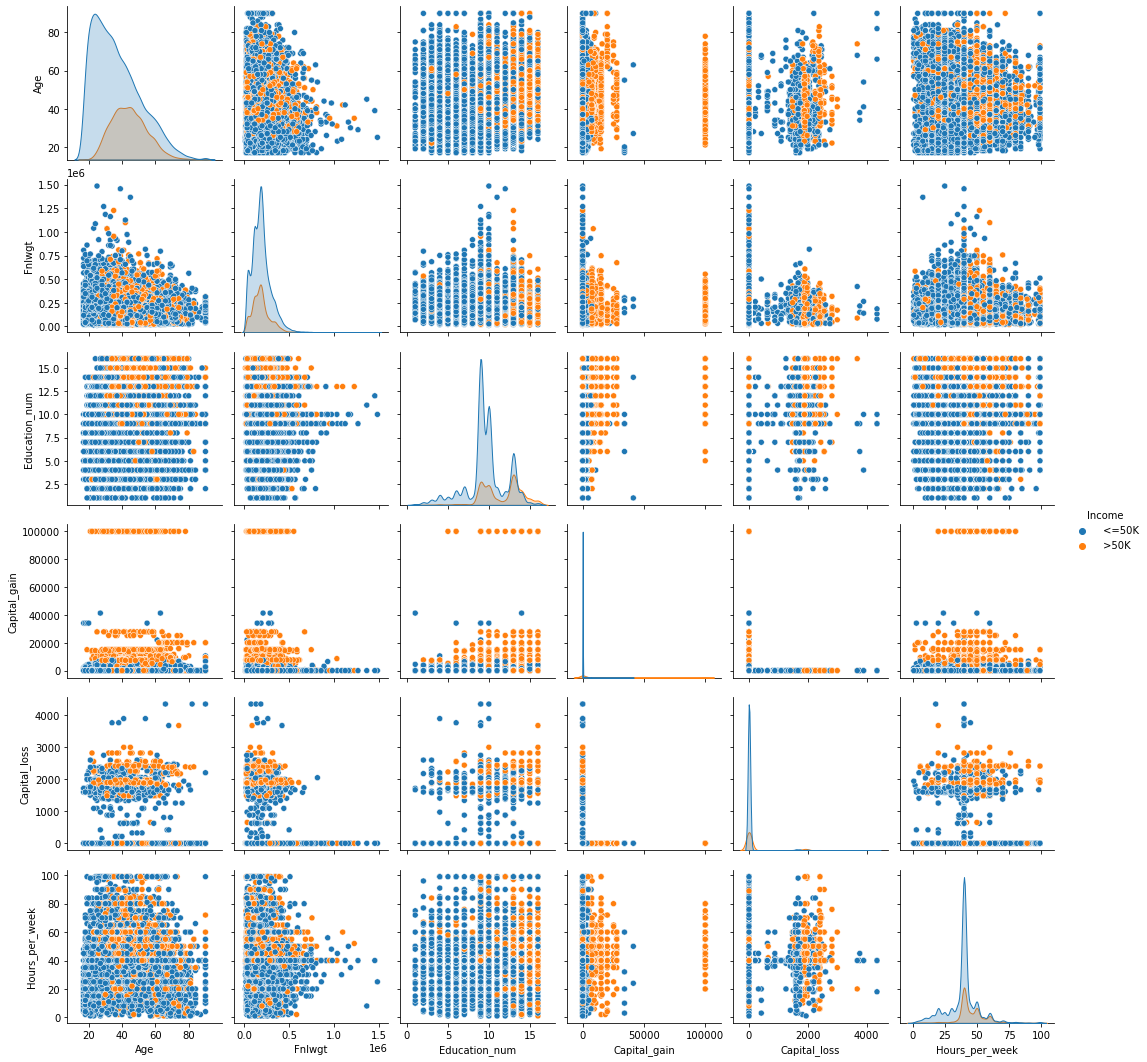

In [64]:
#pair ploting for df
sns.pairplot(df,hue="Income")

# Observations

Above are the pair plots of df.And we can say that there are some extreme outliers in the dataset.And we can observe there is some skewness present.

## Feature Removal

- Education num and education are giving similar information
- Relationship and marital status imply similar information.Hence keeping only one of the two.

# Checking for outliers:

In [65]:
#Checking for outliers using boxplot
df.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),color='r')

<AxesSubplot:>

# Observations
There are outliers in all the numerical columns. We have to remove them.

# Removing outliers:

In [66]:
#Taking all the column names with outliers as a list
dfoutliers=df[["Age","Fnlwgt","Hours_per_week","Capital_gain","Capital_loss"]]

Above are the list of columns with outliers.

# i) Zscore method:

In [67]:
from scipy.stats import zscore
z=np.abs(zscore(dfoutliers))
df_new=df[(z<3).all(axis=1)]
df_new.head(5)

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

We have removed the outliers using zscore method.

In [68]:
#Checking shape of new dataset
df_new.shape

(30028, 15)

There are 30028 rows and 13 columns in the new dataset .

In [69]:
#Checking shape of old dataset
df.shape

(32560, 15)

Previously there were 32560 rows and 15 columns in the new dataset .

In [71]:
#Checking dataloss in zscore method
Dataloss=(((32560-30028)/32560)*100)
Dataloss

7.776412776412776

In zscore method the dataloss is 7.77% which is less than 10%.But let me have look into IQR method also.

# ii) IQR (Inter Quantile Range) method:

In [72]:
# 1st quantile
Q1=dfoutliers.quantile(0.25)

# 3rd quantile
Q3=dfoutliers.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

Using IQR we have removed the outliers.

In [73]:
#Checking shape of new dataset
df_1.shape

(19724, 15)

There are 19724 rows and 15 columns in the new dataset .

In [75]:
#Checking shape of old dataset
df.shape

(32560, 15)

Previously there were 32560 rows and 15 columns in the new dataset .

In [76]:
#Checking dataloss in IQR method
Dataloss=(((32560-19724)/32560)*100)
Dataloss

39.42260442260442

There is a great dataloss in IQR method so let me stick on to zscore method to remove outliers.

# Checking for skewness:

In [77]:
#Checking for skewness
df_new.skew()

Age                0.489206
Fnlwgt             0.633615
Education_num     -0.324321
Capital_gain       4.957931
Capital_loss      29.761341
Hours_per_week    -0.350891
dtype: float64

# Removing skewness using yeo-johnson method:

In [79]:
# Taking a list as fea with all the columns with skewness.
fea=["Fnlwgt","Capital_gain","Capital_loss"]

In [80]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo_johnson method i have removing the skewness.

In [81]:
# Removing skewness
df_new[fea] = scaler.fit_transform(df_new[fea].values)

In [82]:
#Checking skewness again
df_new[fea].skew()

Fnlwgt          -0.034890
Capital_gain     3.082525
Capital_loss    24.952898
dtype: float64

The columns "Capital_gain" and "Capital_loss" have high skewness so we can drop them.

In [83]:
#Droping Capital_gain column
df_new = df_new.drop(["Capital_gain"],axis=1)

#Droping Capital_loss column
df_new = df_new.drop(["Capital_loss"],axis=1)

In [84]:
#Checking for skewness
df_new.skew()

Age               0.489206
Fnlwgt           -0.034890
Education_num    -0.324321
Hours_per_week   -0.350891
dtype: float64

Now the skewness is removed.

# Label Encoding:

In [85]:
# Separating categorical columns in df_new
cat_col=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Above are the list of categorical columns in new dataset.

In [86]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(LE.fit_transform)

In [87]:
df_new[cat_col].head()

Workclass  Education  Marital_status  Occupation  Relationship  Race  Sex  \
0          5          9               2           3             0     4    1   
1          3         11               0           5             1     4    1   
2          3          1               2           5             0     2    1   
3          3          9               2           9             5     2    0   
4          3         12               2           3             5     4    0   

   Native_country  Income  
0              37       0  
1              37       0  
2              37       0  
3               4       0  
4              37       0

Using label encoder we have encoded the categorical columns.

In [88]:
df_new.head()

Age  Workclass    Fnlwgt  Education  Education_num  Marital_status  \
0   50          5 -1.116219          9             13               2   
1   38          3  0.422177         11              9               0   
2   53          3  0.601968          1              7               2   
3   28          3  1.480733          9             13               2   
4   37          3  1.042787         12             14               2   

   Occupation  Relationship  Race  Sex  Hours_per_week  Native_country  Income  
0           3             0     4    1              13              37       0  
1           5             1     4    1              40              37       0  
2           5             0     2    1              40              37       0  
3           9             5     2    0              40               4       0  
4           3             5     4    0              40              37       0

Above is the new data set after encoding.

# Checking correlation using heat map:

In [89]:
#Assigning a variable for correlation
cor=df_new.corr()

In [90]:
# Checking correlation
cor

Age  Workclass    Fnlwgt  Education  Education_num  \
Age             1.000000   0.032774 -0.067465  -0.012307       0.029319   
Workclass       0.032774   1.000000 -0.024233   0.003333       0.000459   
Fnlwgt         -0.067465  -0.024233  1.000000  -0.025269      -0.043314   
Education      -0.012307   0.003333 -0.025269   1.000000       0.360410   
Education_num   0.029319   0.000459 -0.043314   0.360410       1.000000   
Marital_status -0.284030  -0.016317  0.028300  -0.035853      -0.062141   
Occupation     -0.001509   0.008136 -0.003415  -0.042006       0.066703   
Relationship   -0.266150  -0.057682  0.008535  -0.009153      -0.090168   
Race            0.025182   0.045505 -0.006205   0.015971       0.031629   
Sex             0.086214   0.068906  0.026383  -0.030643       0.006303   
Hours_per_week  0.089518   0.027318 -0.015420   0.056424       0.148738   
Native_country -0.003275  -0.000828 -0.067960   0.080295       0.093321   
Income          0.236579  -0.006898 -0.007188   0.074714       0.317044   

                Marital_status  Occupation  Relationship      Race       Sex  \
Age                  -0.284030   -0.001509     -0.266150  0.025182  0.086214   
Workclass            -0.016317    0.008136     -0.057682  0.045505  0.068906   
Fnlwgt                0.028300   -0.003415      0.008535 -0.006205  0.026383   
Education            -0.035853   -0.042006     -0.009153  0.015971 -0.030643   
Education_num        -0.062141    0.066703     -0.090168  0.031629  0.006303   
Marital_status        1.000000    0.035310      0.185443 -0.066351 -0.124501   
Occupation            0.035310    1.000000     -0.036300 -0.003374  0.048755   
Relationship          0.185443   -0.036300      1.000000 -0.116493 -0.576820   
Race                 -0.066351   -0.003374     -0.116493  1.000000  0.090040   
Sex                  -0.124501    0.048755     -0.576820  0.090040  1.000000   
Hours_per_week       -0.195567   -0.023266     -0.256778  0.045703  0.234314   
Native_country       -0.019743   -0.000991     -0.010104  0.115604  0.001858   
Income               -0.194637    0.030271     -0.244848  0.071960  0.208901   

                Hours_per_week  Native_country    Income  
Age                   0.089518       -0.003275  0.236579  
Workclass             0.027318       -0.000828 -0.006898  
Fnlwgt               -0.015420       -0.067960 -0.007188  
Education             0.056424        0.080295  0.074714  
Education_num         0.148738        0.093321  0.317044  
Marital_status       -0.195567       -0.019743 -0.194637  
Occupation           -0.023266       -0.000991  0.030271  
Relationship         -0.256778       -0.010104 -0.244848  
Race                  0.045703        0.115604  0.071960  
Sex                   0.234314        0.001858  0.208901  
Hours_per_week        1.000000        0.006377  0.230519  
Native_country        0.006377        1.000000  0.021941  
Income                0.230519        0.021941  1.000000

Above are the correlations of all the pair of features.To get better visualization on the correlation of features, plotting it using heat map.

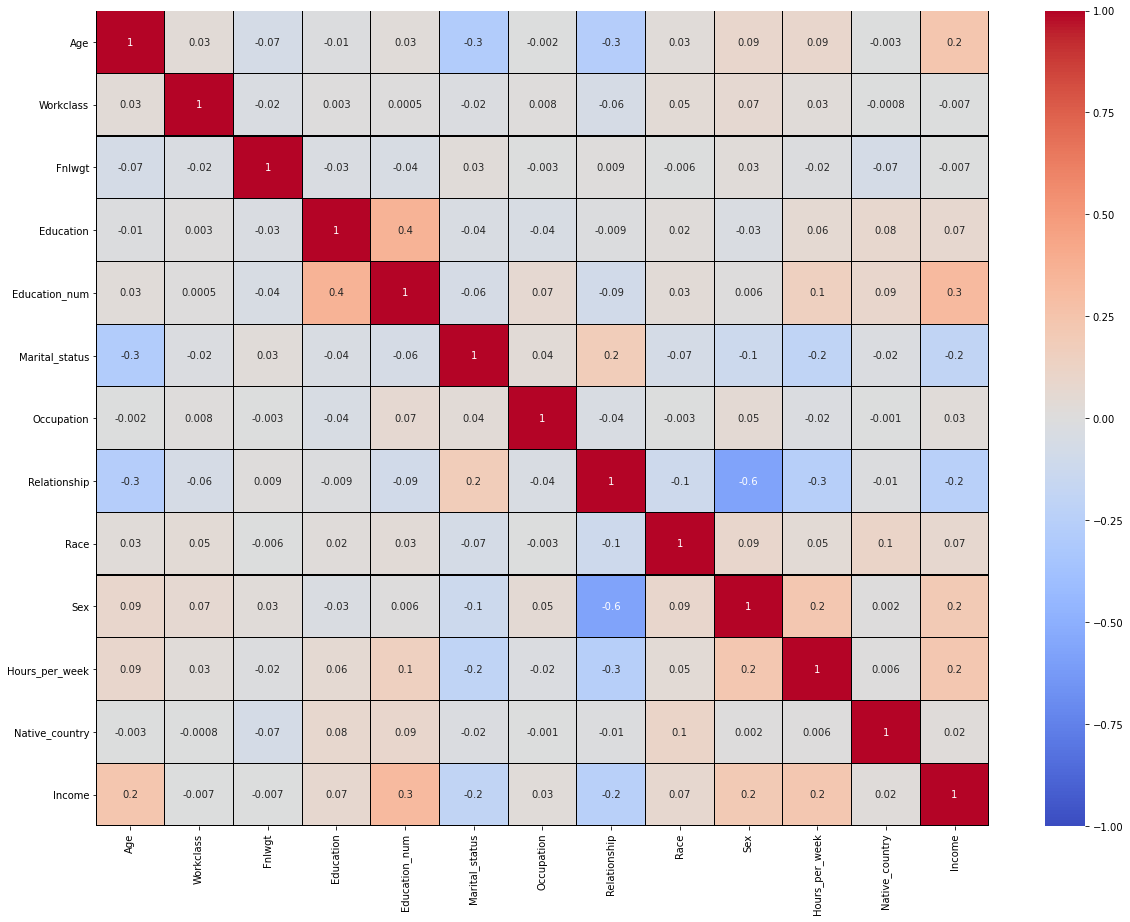

In [91]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

# Observations
By looking into the heat map i can say that there is no multicolinearity issue.
- Workclass and Fnlwgt has very less correlation with target.
- Native_country, Occupation, Race and Education has less correlation with target column.

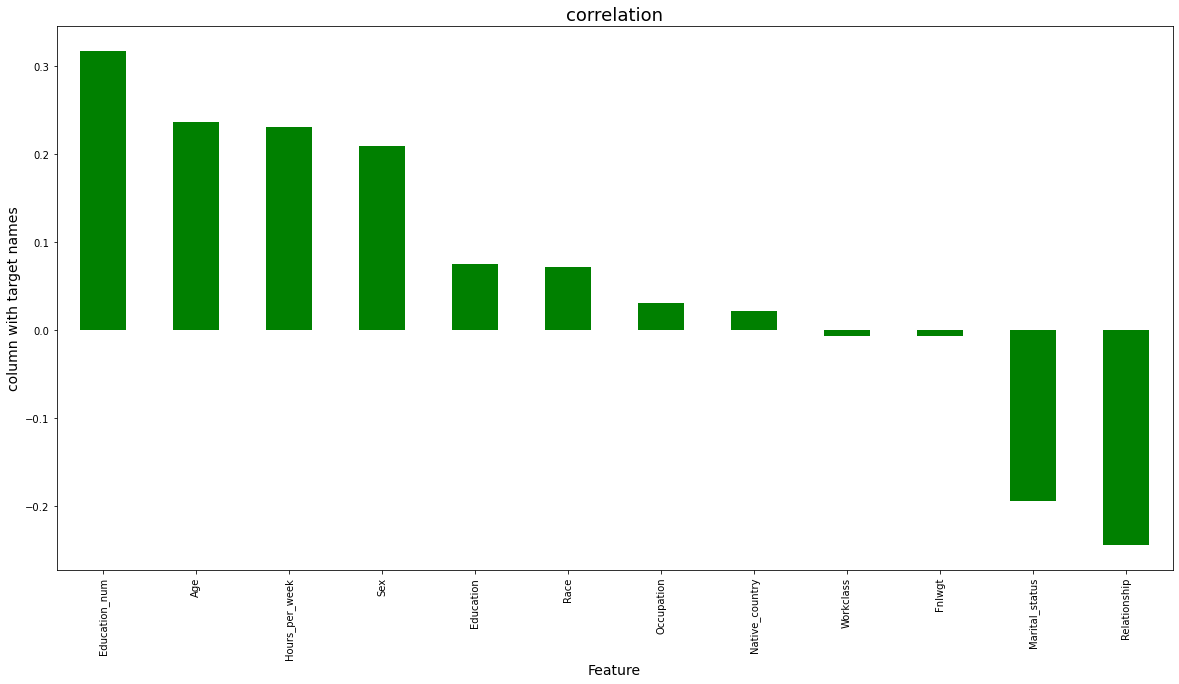

In [92]:
plt.figure(figsize=(20,10))
df_new.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Workclass and Fnlwgt is very less correlated with target column. Hence they can be dropped

In [93]:
#Droping less correlated column
df_new = df_new.drop(["Workclass"],axis=1)

# Separating features and label:

In [95]:
x = df_new.drop("Income",axis=1)
y = df_new["Income"]

I have separated my target and independent columns.

# Scaling the data using standard scaler:

In [96]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

The data has been scaled using standard scaler.

In [97]:
X.head()

Age    Fnlwgt  Education  Education_num  Marital_status  Occupation  \
0  0.883097 -1.116219  -0.329704       1.173719       -0.412219   -0.781979   
1 -0.013956  0.422177   0.183720      -0.402931       -1.732903   -0.279340   
2  1.107361  0.601968  -2.383401      -1.191256       -0.412219   -0.279340   
3 -0.761501  1.480733  -0.329704       1.173719       -0.412219    0.725937   
4 -0.088711  1.042787   0.440432       1.567881       -0.412219   -0.781979   

   Relationship      Race       Sex  Hours_per_week  Native_country  
0     -0.918763  0.394659  0.715637       -2.411906        0.264312  
1     -0.297202  0.394659  0.715637        0.010616        0.264312  
2     -0.918763 -1.953203  0.715637        0.010616        0.264312  
3      2.189042 -1.953203 -1.397357        0.010616       -5.301908  
4      2.189042  0.394659 -1.397357        0.010616        0.264312

This is the data of independent variables after scaling.

# Balancing the target variable using oversampling:

In [98]:
#Checking the value count of target column
y.value_counts()

0    23369
1     6659
Name: Income, dtype: int64

In [99]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, y = SM.fit_resample(X,y)

In [100]:
# Checking the value counts again
y.value_counts()

0    23369
1    23369
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

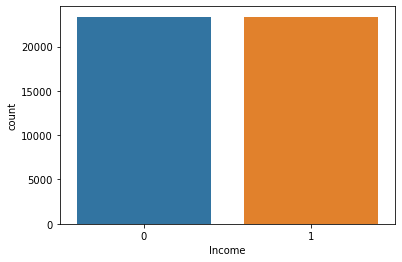

In [101]:
# Visualizing the data after oversampling
sns.countplot(y)

Now the data is balanced.

# Finding Best Random State and Accuracy:

In [102]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [103]:
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.890600484952218  on Random_state  151


The above are the best accuracy and random state.

In [104]:
# Creating train and test data.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

# Classification Algorithms:

In [105]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

# i) DecisionTreeClassifier:

In [106]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
preddt=DTC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, preddt))
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

Accuracy Score: 0.8383254885180431
Confusion Matrix: [[5873 1190]
 [1077 5882]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      7063
           1       0.83      0.85      0.84      6959

    accuracy                           0.84     14022
   macro avg       0.84      0.84      0.84     14022
weighted avg       0.84      0.84      0.84     14022



DTC is giving 83% accuracy.

In [107]:
cm = confusion_matrix(y_test, preddt)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

We can see the true values and predicted values in Decision Tree Classifier model using confusion matrix.

# ii) RandomForestClassifier:

In [108]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
predrf=RFC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predrf))
print('Confusion Matrix:',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score: 0.8888888888888888
Confusion Matrix: [[6130  933]
 [ 625 6334]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      7063
           1       0.87      0.91      0.89      6959

    accuracy                           0.89     14022
   macro avg       0.89      0.89      0.89     14022
weighted avg       0.89      0.89      0.89     14022



RFC is giving 88% accuracy.

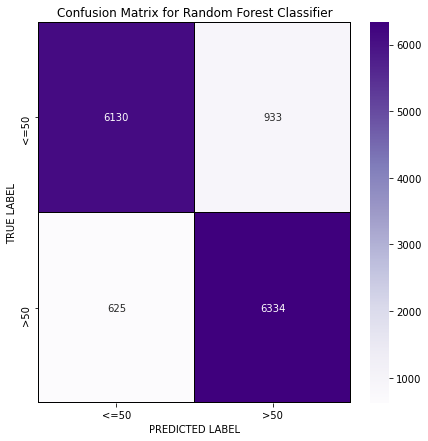

In [109]:
cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

We can see the true values and predicted values in Random Forest Classifier model using confusion matrix.

# iii) SupportVectorClassifier:

In [110]:
SV=SVC()
SV.fit(X_train,y_train)
predsv=SV.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predsv))
print('Confusion Matrix:',confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

Accuracy Score: 0.8196405648267009
Confusion Matrix: [[5285 1778]
 [ 751 6208]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      7063
           1       0.78      0.89      0.83      6959

    accuracy                           0.82     14022
   macro avg       0.83      0.82      0.82     14022
weighted avg       0.83      0.82      0.82     14022



SVC is giving 82% accuracy.

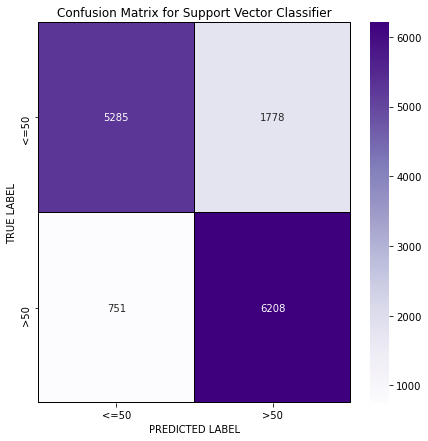

In [111]:
cm = confusion_matrix(y_test, predsv)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

We can see the true values and predicted values in Support vector Classifier model using confusion matrix.

# iv) K-Neighbor Classifier:

In [112]:
knn=KNN()
knn.fit(X_train,y_train)
predkn=knn.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predkn))
print('Confusion Matrix:',confusion_matrix(y_test, predkn))
print(classification_report(y_test,predkn))

Accuracy Score: 0.8463129368135787
Confusion Matrix: [[5383 1680]
 [ 475 6484]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      7063
           1       0.79      0.93      0.86      6959

    accuracy                           0.85     14022
   macro avg       0.86      0.85      0.85     14022
weighted avg       0.86      0.85      0.85     14022



KNN is giving 84% accuracy.

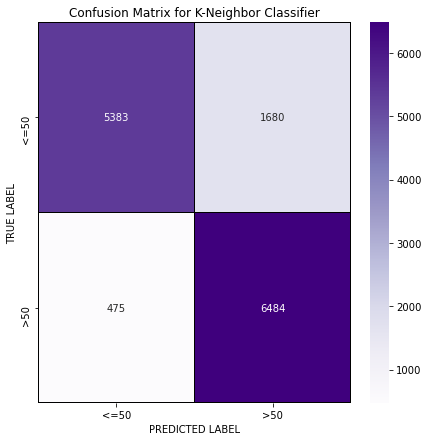

In [113]:
cm = confusion_matrix(y_test, predkn)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for K-Neighbor Classifier')
plt.show()

We can see the true values and predicted values in KNN Classifier model using confusion matrix.

# v) Gradient Boosting Classifier:

In [114]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
predgb=GBC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predgb))
print('Confusion Matrix:',confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

Accuracy Score: 0.8525887890457852
Confusion Matrix: [[5698 1365]
 [ 702 6257]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      7063
           1       0.82      0.90      0.86      6959

    accuracy                           0.85     14022
   macro avg       0.86      0.85      0.85     14022
weighted avg       0.86      0.85      0.85     14022



GBC is giving 85% accuracy.

In [116]:
cm = confusion_matrix(y_test, predgb)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

We can see the true values and predicted values in GB Classifier model using confusion matrix.

# vi) XGBClassifier:

In [117]:
XGB=XGBClassifier()
XGB.fit(X_train,y_train)
predxg=XGB.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predxg))
print('Confusion Matrix:',confusion_matrix(y_test, predxg))
print(classification_report(y_test,predxg))

[23:15:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.8910283839680502
Confusion Matrix: [[6215  848]
 [ 680 6279]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7063
           1       0.88      0.90      0.89      6959

    accuracy                           0.89     14022
   macro avg       0.89      0.89      0.89     14022
weighted avg       0.89      0.89      0.89     14022



XGB Classifier is giving 89% accuracy.

In [118]:
cm = confusion_matrix(y_test, predxg)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for XGBClassifier')
plt.show()

We can see the true values and predicted values in XGB Classifier model using confusion matrix.

# vii) Logistic Regression:

In [119]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
predlr=LR.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predlr))
print('Confusion Matrix:',confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

Accuracy Score: 0.7512480387961774
Confusion Matrix: [[5157 1906]
 [1582 5377]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      7063
           1       0.74      0.77      0.76      6959

    accuracy                           0.75     14022
   macro avg       0.75      0.75      0.75     14022
weighted avg       0.75      0.75      0.75     14022



LR is giving  75% accuracy

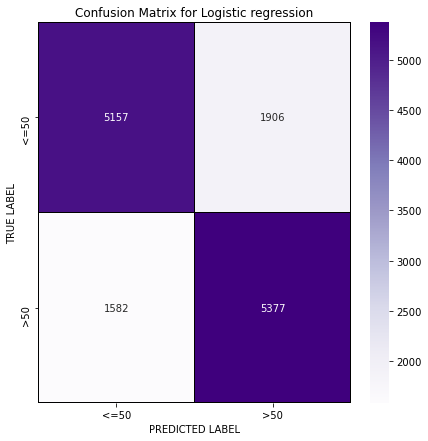

In [121]:
cm = confusion_matrix(y_test, predlr)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic regression')
plt.show()

We can see the true values and predicted values in LR model using confusion matrix.

# Cross Validation Score:

In [122]:
#Importing library
from sklearn.model_selection import cross_val_score

In [123]:
# cv score for Logistic Regression 
print(cross_val_score(LR,X,y,cv=5).mean())

0.7470368164825951


In [124]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,X,y,cv=5).mean())

0.8378636609450337


In [125]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,X,y,cv=5).mean())

0.8874163652443819


In [126]:
# cv score for Support Vector Classifier
print(cross_val_score(SV,X,y,cv=5).mean())

0.8189484048641594


In [127]:
# cv score for KNN Classifier
print(cross_val_score(knn,X,y,cv=5).mean())

0.8510209788628323


In [128]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GBC,X,y,cv=5).mean())

0.8489675122238713


In [129]:
# cv score for XGB Classifier
print(cross_val_score(XGB,X,y,cv=5).mean())

[23:26:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

Above are the cross validation scores of DTC, RFC, SVM, KNN, GBC, XGB and LR.


By looking into the difference of model accuracy and cross validation score we can find that RFC is best model.

# Hyper Parameter tuning:

In [130]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [131]:
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["auto","sqrt","log2"]}

Giving the parameters list for RFC model.

In [132]:
# Running grid search CV for RFC.
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [133]:
# Training the model with GCV.
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

In [134]:
# Fetching the best parameters for RFC.
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'log2',
 'n_estimators': 400}

In [135]:
Final_model=RandomForestClassifier(criterion='gini',max_depth=25, max_features='log2', n_estimators=400)
Final_model.fit(X_train,y_train)
pred=Final_model.predict(X_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

88.69633433176438


The best model RFC has got the accuracy 88.69% after tunning

# ROC-AUC curve:

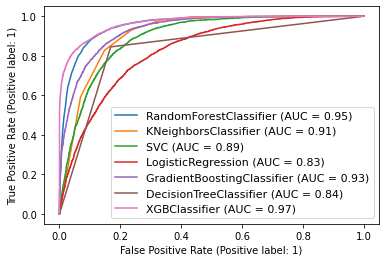

In [136]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(RFC,X_test,y_test)
plot_roc_curve(knn, X_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(SV, X_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, X_test, y_test, ax=disp.ax_)
plot_roc_curve(GBC, X_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, X_test, y_test, ax=disp.ax_)
plot_roc_curve(XGB, X_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

Above is the ROC curves for all the models that we have predicted.And the AUC values can also be seen in the plot.

# Saving the model:

In [137]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_model,"Census_income.pkl")

['Census_income.pkl']

# Predictions:

In [138]:
# Loading the saved model
model=joblib.load("Census_income.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([1, 0, 1, ..., 0, 0, 1])

In [139]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

0      1      2      3      4      5      6      7      8      \
Predicted      1      0      1      1      0      0      1      0      0   
Actual         1      0      1      1      0      1      1      0      0   

           9      10     11     12     13     14     15     16     17     \
Predicted      1      0      0      1      0      0      1      1      0   
Actual         0      0      0      1      0      0      0      1      0   

           18     19     20     21     22     23     24     25     26     \
Predicted      1      1      0      1      1      1      0      0      1   
Actual         1      1      0      1      1      1      0      0      1   

           27     28     29     30     31     32     33     34     35     \
Predicted      0      1      1      1      0      1      0      0      1   
Actual         1      1      1      1      0      1      0      0      1   

           36     37     38     39     40     41     42     43     44     \
Predicted      1      1      1      0      0      0      0      0      0   
Actual         1      1      1      0      0      0      1      0      0   

           45     46     47     48     49     50     51     52     53     \
Predicted      1      1      0      1      0      1      1      1      0   
Actual         1      1      0      1      0      1      1      1      0   

           54     55     56     57     58     59     60     61     62     \
Predicted      0      0      0      1      1      0      1      0      0   
Actual         0      0      0      1      1      0      1      0      0   

           63     64     65     66     67     68     69     70     71     \
Predicted      1      0      1      1      1      0      0      1      0   
Actual         1      0      1      1      1      0      0      1      0   

           72     73     74     75     76     77     78     79     80     \
Predicted      1      0      0      0      0      0      0      0      0   
Actual         1      0      0      0      0      0      0      0      1   

           81     82     83     84     85     86     87     88     89     \
Predicted      0      0      1      1      0      1      0      1      0   
Actual         0      0      1      1      0      1      0      1      0   

           90     91     92     93     94     95     96     97     98     \
Predicted      0      0      1      0      1      0      1      1      1   
Actual         0      0      1      0      1      0      0      1      1   

           99     100    101    102    103    104    105    106    107    \
Predicted      1      0      0      0      0      0      0      1      1   
Actual         1      1      0      0      0      0      0      1      1   

           108    109    110    111    112    113    114    115    116    \
Predicted      0      1      1      0      1      1      1      1      1   
Actual         0      1      1      0      1      1      1      1      1   

           117    118    119    120    121    122    123    124    125    \
Predicted      0      1      1      0      0      1      1      1      0   
Actual         0      1      1      0      0      1      0      1      1   

           126    127    128    129    130    131    132    133    134    \
Predicted      1      0      0      1      0      1      1      1      0   
Actual         1      0      0      1      0      1      1      1      0   

           135    136    137    138    139    140    141    142    143    \
Predicted      0      1      0      0      0      1      1      1      1   
Actual         0      1      0      0      0      0      1      1      1   

           144    145    146    147    148    149    150    151    152    \
Predicted      0      1      1      1      0      1      0      1      1   
Actual         0      1      1      1      0      1      0      0      0   

           153    154    155    156    157    158    159    160    161    \
Predicted      1      0      1      1     

Above are the predicted values and the actual values.They are almost similar.

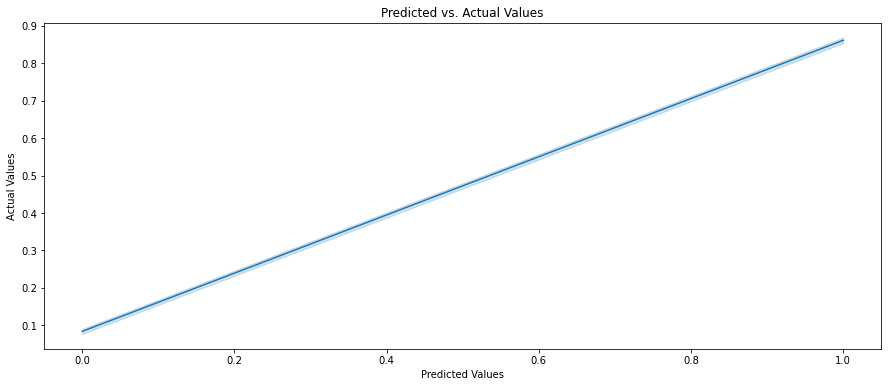

In [140]:
#Plotting predicted vs. actual values

plt.figure(figsize=[15,6])
sns.lineplot(x=prediction, y=y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.show()

It can be observed that the predictions are almost close to original values apart from the fact that there is minimal variation.